In [11]:
!pip3 install --upgrade pyyaml


     |████████████████████████████████| 276kB 4.7MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44621 sha256=56599d46db075239d9c911cf1da7091c55436e705e312ae186444edc03dac8da
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [14]:
from simple_playgrounds.entities.agents import BaseInteractiveAgent
from simple_playgrounds.entities.agents.sensors.visual_sensors import RgbSensor
from simple_playgrounds.controllers import Random
from simple_playgrounds.playgrounds.collection.test import Interactives
from simple_playgrounds import Engine


%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
my_agent = BaseInteractiveAgent(name = 'mercotte', controller=Random())
my_agent.add_sensor(RgbSensor(name='rgb_1', anchor= my_agent.base_platform, invisible_elements=my_agent.parts, resolution=128, range=300))

In [9]:
playground = Interactives()

In [10]:
game = Engine(playground=playground, agents=my_agent, time_limit=100000, replay=True, screen=False)

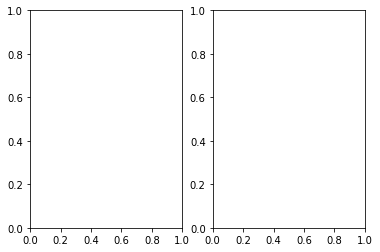

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2)


In [13]:
import time

while game.game_on:

    actions = {}
    for agent in game.agents:
        actions[agent.name] = agent.controller.generate_actions()

    game.step(actions)
    game.update_observations()

    img = game.generate_sensor_image(my_agent)
    ax1.imshow(img)
    
    if my_agent.reward != 0: print(my_agent.name, my_agent.reward)

    img = game.generate_topdown_image()
    ax2.imshow(img)
    plt.show()
    time.sleep(0.01)
    

KeyboardInterrupt: ignored